In [1]:
import warnings
warnings.filterwarnings("ignore")  # "error", "ignore", "always", "default", "module" or "once"

In [8]:
import pandas as pd
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

import numpy as np
from collections import Counter


In [9]:
data = pd.read_csv ('100_refuge_extracted_features.csv', header=None)

In [10]:
data

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,1,1.074311,-0.687043,0.514023,-0.118812,-0.000469,-0.245388,0.060804,0.152865,-0.137170,...,0.127250,0.153293,0.033402,-0.004438,0.050318,-0.239905,-0.276410,0.028661,0.023444,-0.079460
1,1,-0.797817,-1.209638,0.319586,-0.276836,-0.599212,0.449622,0.089984,-0.109025,-0.308158,...,0.139650,0.225137,0.023051,-0.077325,0.097263,0.240357,0.173097,-0.152237,-0.147265,0.233386
2,1,-0.443978,-0.298577,-0.491385,-1.092305,0.609071,0.461601,-0.103651,0.320104,-0.337844,...,0.175423,0.016509,-0.081370,-0.136465,-0.007868,-0.188457,0.198201,0.133917,-0.225465,0.144876
3,1,0.457385,-0.388184,0.308262,-0.912180,0.459564,0.025902,-0.526805,-0.005001,-0.424236,...,-0.075490,0.015553,0.335993,-0.134232,-0.080628,-0.093935,-0.002174,-0.329860,-0.139806,0.079054
4,1,0.054365,0.047503,0.823735,-0.856117,-0.381738,0.107486,0.427200,-0.046268,-0.268423,...,0.006880,0.399962,0.046176,0.148698,0.113728,-0.082501,-0.104788,-0.281253,-0.003464,0.081942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,1.063730,0.230392,-0.805209,-0.857984,0.069959,-0.117603,0.439376,-0.758325,0.463436,...,-0.076293,-0.015683,-0.057965,-0.076603,0.240031,0.078271,-0.029968,-0.041303,-0.050314,-0.175718
396,0,-1.678097,-0.327687,0.838221,0.076939,-0.369471,0.821577,0.686217,0.085438,-0.568368,...,-0.007249,0.032029,-0.214004,-0.301357,-0.009998,-0.487561,0.234531,-0.204600,0.033923,0.124870
397,0,-1.539434,0.036052,0.587558,-0.049255,-0.101222,0.228741,0.087365,-0.226093,0.240308,...,-0.332158,0.081613,0.112529,0.019828,0.309140,-0.059073,0.023435,0.074199,0.189240,-0.140213
398,0,0.971858,-0.629083,0.784336,-0.575288,-0.515951,-0.630385,0.174666,0.125241,-0.361780,...,0.175376,-0.058856,-0.108881,-0.040039,-0.272979,0.189636,0.060656,0.129053,-0.145933,0.345656


In [11]:
df = np.array(data.iloc[:,range(1,data.shape[1])])
y = data.iloc[:,0]

In [12]:
#===============================================================================
# Synthetic minority over-sampleing technique for balancing the Refuge dataset
#===============================================================================
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit target and predictor variable
x_smote , y_smote = smote.fit_resample(df, y)

print('Origianl dataset shape:', Counter(y))
print('Resampple dataset shape:', Counter(y_smote))

Origianl dataset shape: Counter({0: 360, 1: 40})
Resampple dataset shape: Counter({1: 360, 0: 360})


In [61]:
# from mlxtend.classifier import EnsembleVoteClassifier
# import csv

# clf1 = MLPClassifier(max_iter=300)
# clf2 = svm.SVC()
# clf3 =  RandomForestClassifier( n_estimators=100 , random_state = 7 )

# eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])

# labels = ['MLP', 'SVM' ,'Random Forest', 'Majority-Voting-Ensemble']
# for clf, label in zip([clf1, clf2, clf3, eclf], labels):
    
    
#     scores = model_selection.cross_validate(clf, X, Y, 
#                                               cv=7, 
#                                               scoring=['accuracy', 'f1'])

# #     scores = model_selection.cross_val_score(clf, X, Y, 
# #                                               cv=5, 
# #                                               scoring=['accuracy', 'f1'])
#     print("Average Accuracy: %0.2f (+/- %0.2f) [%s]" 
#           % (scores['test_accuracy'].mean(), scores['test_accuracy'].std(), label))
#     print("Average F1-score: %0.2f (+/- %0.2f) [%s]" 
#           % (scores['test_f1'].mean(), scores['test_f1'].std(), label))
    
#     my_dict = scores
#     filename = str(clf) + '_fundus_test_results_7_fold.csv'
#     with open(filename, 'w') as f:
#         for key in my_dict.keys():
#             f.write("%s,%s\n"%(key,my_dict[key]))

In [62]:
####################################################################################
# #------------------------------BASE MODEL LEARNING (K-FOLD)------------------------#
# ####################################################################################

# from sklearn.metrics import precision_recall_fscore_support as score
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import confusion_matrix
# from mlxtend.classifier import EnsembleVoteClassifier
# import csv
# from sklearn.metrics import accuracy_score


# clf1 = MLPClassifier(max_iter=300)
# clf2 = svm.SVC()
# clf3 =  RandomForestClassifier( n_estimators=100 , random_state = 7 )

# eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])

# clfs=[clf1,clf2,clf3,eclf]

# labels = ['MLP', 'SVM' ,'Random Forest', 'Majority-Voting-Ensemble']

# # fix random seed for reproducibility
# seed = 100000
# np.random.seed(seed)

# folds=7 #How Many Folds

# cv_train_set=[]
# cv_test_set=[]
# kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=seed)

# for train_index,test_index in kfold.split(df,y):
#     cv_train_set.append(train_index)
#     cv_test_set.append(test_index)
    
    
# base_models_cvscores = [] #Storing Matrix

# for clf, label in zip(clfs, labels):
#     print('============================================================================================')
#     print(label)
#     for indx in range(0,folds):
#         # Fit the model
#         history=clf.fit(df[cv_train_set[indx]], y[cv_train_set[indx]])
        
#         # evaluate the model
#         y_prdt=clf.predict(df[cv_test_set[indx]])
#         y_test=y[cv_test_set[indx]]
#         precision, recall, fscore, support = score(y_test, y_prdt)
#         acc=accuracy_score(y_test, y_prdt)
#         cm = confusion_matrix(y_test, y_prdt)
#         print('----------------------------------------------------------')
#         print('Fold:',indx)
#         print("Test Result for: , [%s]" 
#               %(label))
#         print('precision: {0:.4f}'.format(np.mean(precision)*100))
#         print('recall: {0:.4f}'.format(np.mean(recall)*100))
#         print('fscore: {0:.4f}'.format(np.mean(fscore)*100))
#         print('Accuracy: {0:.4f}'.format(acc*100))
#         print('Confusion Matrix:')
#         print(cm)
#         print('----------------------------------------------------------')
#         base_models_cvscores.append(['Fold'+str(indx),label,np.mean(precision)*100,
#                                      np.mean(recall)*100, np.mean(fscore)*100,acc*100])
# print('=======================================XXX===================================================')

MLP
----------------------------------------------------------
Fold: 0
Test Result for: , [MLP]
precision: 98.1302
recall: 98.0583
fscore: 98.0572
Accuracy: 98.0583
Confusion Matrix:
TPR  0.9607843137254902
TNR  1.0
FPR  0.0
PPV  1.0
NPV  0.9629629629629629
L+  inf
L-  0.039215686274509776
[[49  2]
 [ 0 52]]
ROC  0.9803921568627452
----------------------------------------------------------
----------------------------------------------------------
Fold: 1
Test Result for: , [MLP]
precision: 94.7774
recall: 94.1748
fscore: 94.1516
Accuracy: 94.1748
Confusion Matrix:
TPR  0.8823529411764706
TNR  1.0
FPR  0.0
PPV  1.0
NPV  0.896551724137931
L+  inf
L-  0.11764705882352944
[[45  6]
 [ 0 52]]
ROC  0.9411764705882353
----------------------------------------------------------
----------------------------------------------------------
Fold: 2
Test Result for: , [MLP]
precision: 99.0474
recall: 99.0291
fscore: 99.0289
Accuracy: 99.0291
Confusion Matrix:
TPR  0.9803921568627451
TNR  1.0
FPR  0.0

----------------------------------------------------------
Majority-Voting-Ensemble
----------------------------------------------------------
Fold: 0
Test Result for: , [Majority-Voting-Ensemble]
precision: 100.0000
recall: 100.0000
fscore: 100.0000
Accuracy: 100.0000
Confusion Matrix:
TPR  1.0
TNR  1.0
FPR  0.0
PPV  1.0
NPV  1.0
L+  inf
L-  0.0
[[51  0]
 [ 0 52]]
ROC  1.0
----------------------------------------------------------
----------------------------------------------------------
Fold: 1
Test Result for: , [Majority-Voting-Ensemble]
precision: 98.1302
recall: 98.0583
fscore: 98.0572
Accuracy: 98.0583
Confusion Matrix:
TPR  0.9607843137254902
TNR  1.0
FPR  0.0
PPV  1.0
NPV  0.9629629629629629
L+  inf
L-  0.039215686274509776
[[49  2]
 [ 0 52]]
ROC  0.9803921568627452
----------------------------------------------------------
----------------------------------------------------------
Fold: 2
Test Result for: , [Majority-Voting-Ensemble]
precision: 100.0000
recall: 100.0000
fsco

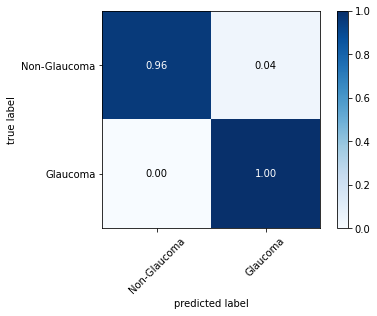

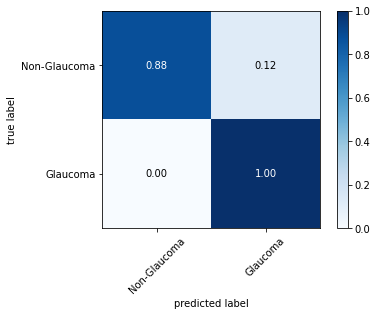

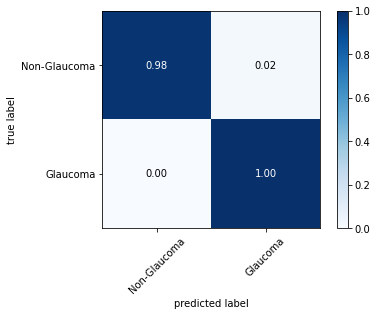

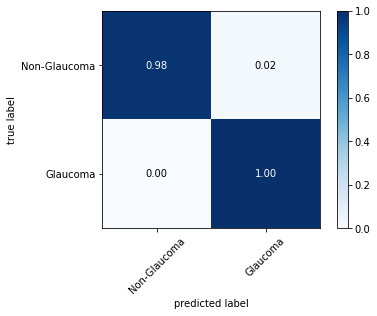

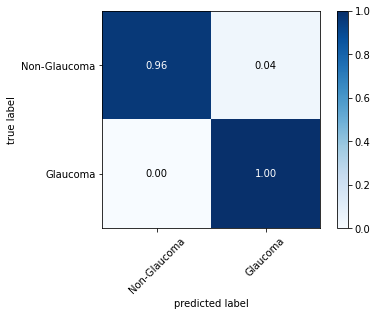

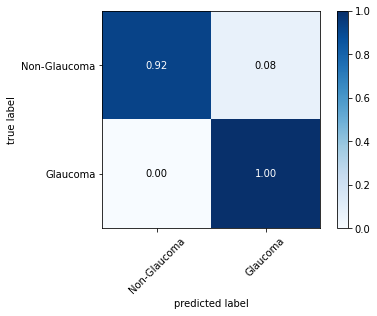

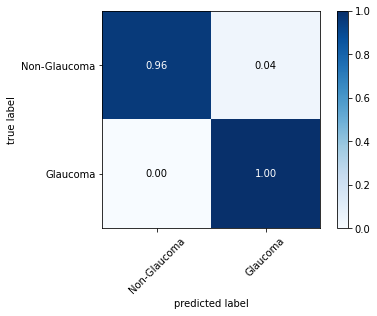

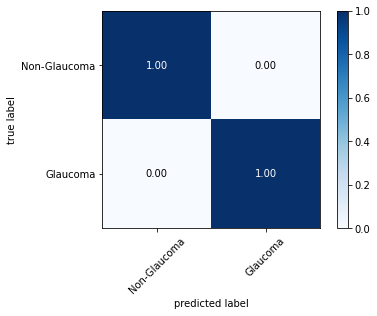

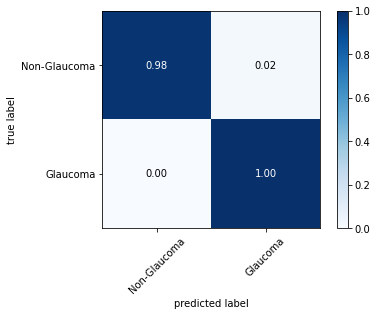

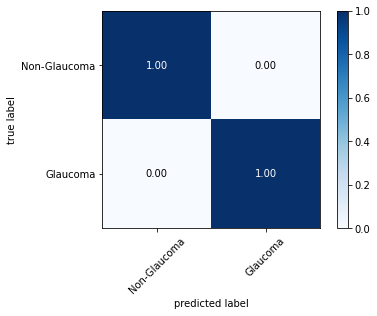

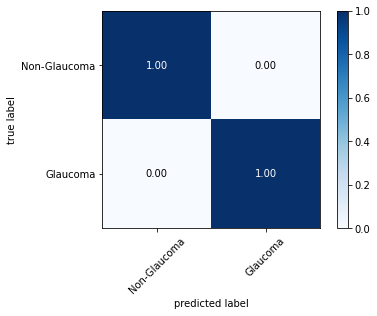

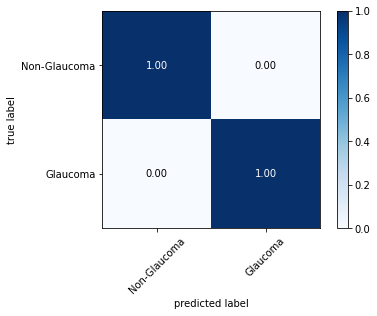

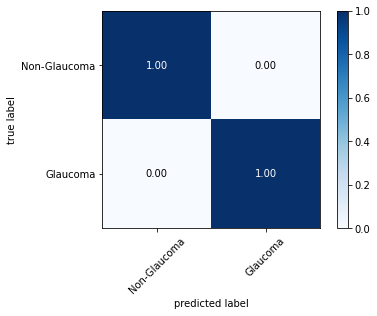

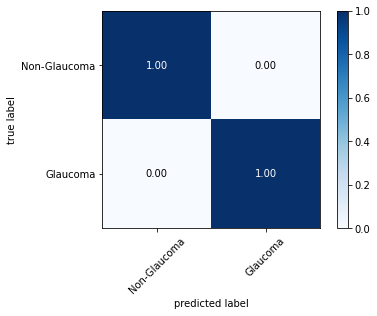

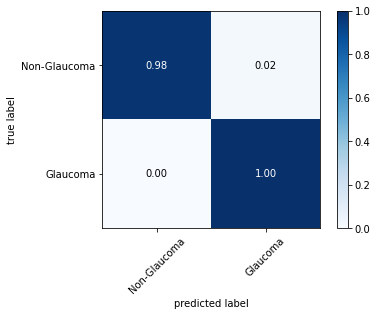

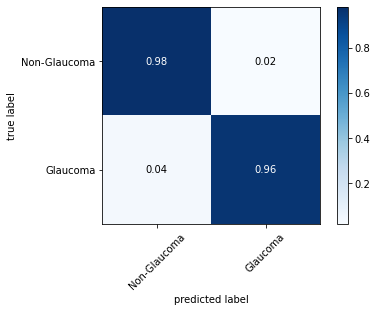

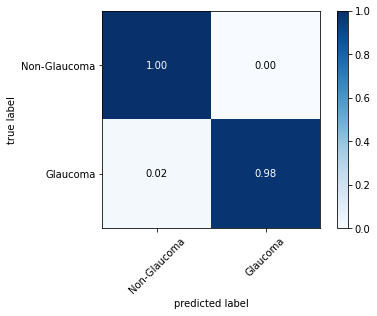

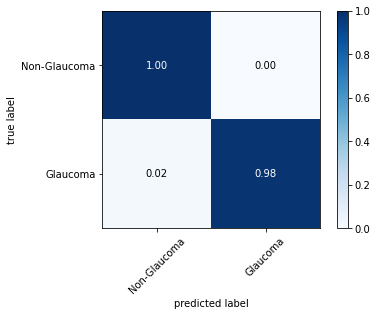

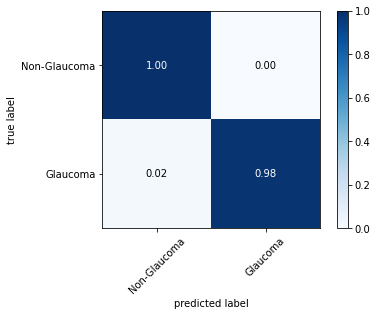

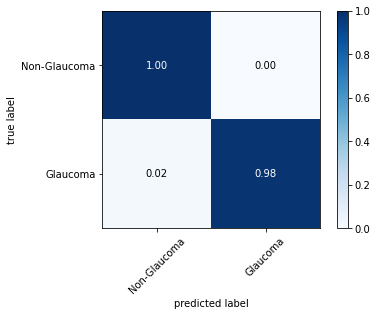

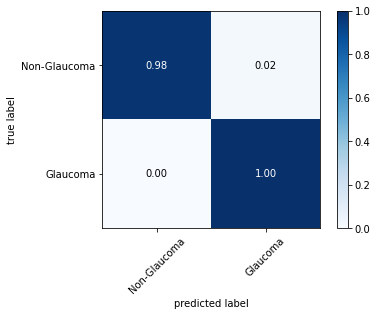

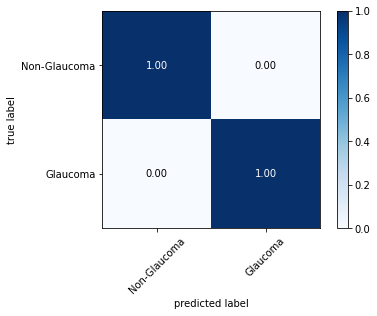

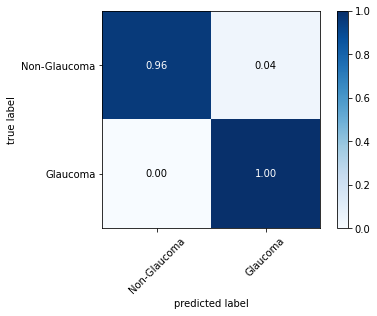

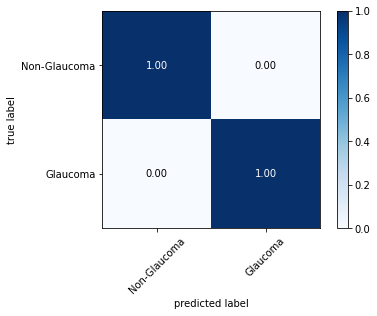

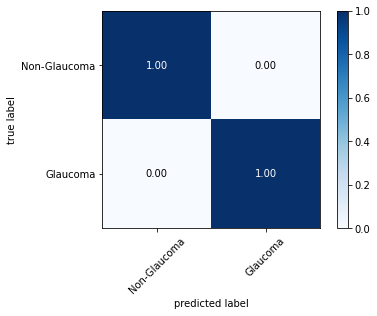

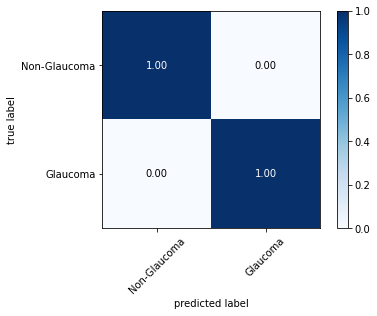

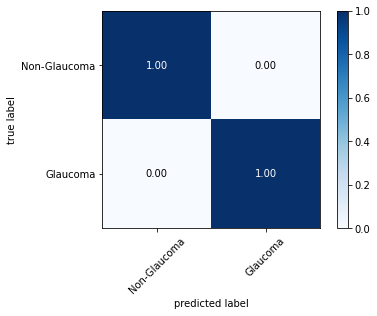

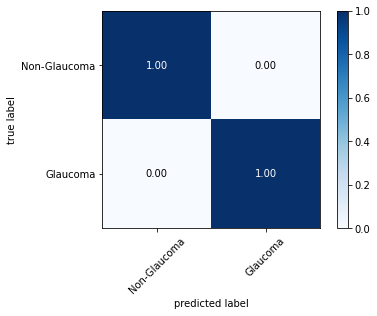

In [23]:
####################################################################################
#------------------------------BASE MODEL LEARNING (K-FOLD)------------------------#
####################################################################################

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from mlxtend.classifier import EnsembleVoteClassifier
import csv
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
# from matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score




clf1 = MLPClassifier(max_iter=300)
clf2 = svm.SVC()
clf3 =  RandomForestClassifier( n_estimators=100 , random_state = 7 )

eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])

clfs=[clf1,clf2,clf3,eclf]

labels = ['MLP', 'SVM' ,'Random Forest', 'Majority-Voting-Ensemble']

# fix random seed for reproducibility
seed = 100000
np.random.seed(seed)

folds=7 #How Many Folds

cv_train_set=[]
cv_test_set=[]
kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=seed)

for train_index,test_index in kfold.split(x_smote,y_smote):
    cv_train_set.append(train_index)
    cv_test_set.append(test_index)
    
    
base_models_cvscores = [] #Storing Matrix
for clf, label in zip(clfs, labels):
    print('============================================================================================')
    print(label)
    for indx in range(0,folds):
        # Fit the model
        history=clf.fit(x_smote[cv_train_set[indx]], y_smote[cv_train_set[indx]])
        
        # evaluate the model
        y_prdt=clf.predict(x_smote[cv_test_set[indx]])
        y_test=y_smote[cv_test_set[indx]]
        precision, recall, fscore, support = score(y_test, y_prdt, average='weighted', 
                                                   labels=np.unique(y_prdt))
        acc=accuracy_score(y_test, y_prdt)
        cm = confusion_matrix(y_test, y_prdt)
        TP = cm[0][0]
        FN = cm[0][1]
        FP = cm[1][0]
        TN = cm[1][1]
        TPR = TP/(TP+FN)
        FPR = FP/(FP+TN)
        PPV = TP/(TP+FP)
        NPV = TN/(TN+FN)
        TNR = TN/(TN+FP) # Specificity = TN / (TN + FP)
        TPR = TP/(TP+FN) # Sensitivity (Recall) 
        
        
        LRPOS = TPR/ (1-TNR)
        LRNEG = (1-TPR)/TNR
        
        
        roc_score = roc_auc_score(y_test, y_prdt)
        print('----------------------------------------------------------')
        print('Fold:',indx)
        print("Test Result for: , [%s]" 
              %(label))
        print('precision: {0:.4f}'.format(np.mean(precision)*100))
        print('recall: {0:.4f}'.format(np.mean(recall)*100))
        print('fscore: {0:.4f}'.format(np.mean(fscore)*100))
        print('Accuracy: {0:.4f}'.format(acc*100))
        print('Confusion Matrix:')
        print('TPR ',TPR)
        print('TNR ',TNR)
        print('FPR ',FPR)
        print('PPV ',PPV)
        print('NPV ',NPV)
        print('L+ ',LRPOS)
        print('L- ',LRNEG)
        print(cm)
        print('ROC ',roc_score)
        
        

        class_names = ['Non-Glaucoma','Glaucoma']

        fig, ax = plot_confusion_matrix(conf_mat=cm,
                                        colorbar=True,
                                        show_absolute=False,
                                        show_normed=True,
                                        class_names=class_names)

        plt.savefig('final_plots/Fold_'+str(indx)+'_'+label+'.png', bbox_inches = 'tight')


        ## Display the visualization of the Confusion Matrix.
#         plt.show()
        print('----------------------------------------------------------')
        base_models_cvscores.append([str(indx),label,np.mean(precision),
                                     np.mean(recall), np.mean(fscore),acc,TPR,FPR,LRPOS,LRNEG,roc_score])
print('=======================================XXX===================================================')
result_lables = ['Fold', 'Model', 'Precision', 'Recall','F1', 'Acc', 'TPR', 'FPR', 'LRPOS', 'LRNEG', 'ROC']

base_models_cvscores = pd.DataFrame(base_models_cvscores)
base_models_cvscores.to_csv('final_result/Final_result_2022.csv', header = result_lables)

In [24]:
#================================================
#Final Result analysis
#================================================
result_final = pd.read_csv('final_result/Final_result_2022.csv')
result_final

labels = ['MLP', 'SVM' ,'Random Forest', 'Majority-Voting-Ensemble']

final_result_avg_for_paper= list()
final_result_std_for_paper= list()

for i  in labels:
    indx = np.where(result_final['Model'] == i)
    val_avg = np.mean(result_final.iloc[indx[0],range(3,12)], axis= 0)
    val_std = np.std(result_final.iloc[indx[0],range(3,12)], axis= 0)
    final_result_avg_for_paper.append([i, val_avg[0],val_avg[1],val_avg[2],val_avg[3], val_avg[4], val_avg[5],val_avg[6],val_avg[7], val_avg[8]])
    final_result_std_for_paper.append([i, val_std[0],val_std[1],val_std[2],val_std[3], val_std[4], val_std[5],val_std[6],val_std[7], val_std[8]])
    

final_result_avg_for_paper  = pd.DataFrame(final_result_avg_for_paper)
final_result_std_for_paper  = pd.DataFrame(final_result_std_for_paper)

In [25]:
final_result_avg_for_paper.to_csv('final_result/Final_result_avg_paper_2022.csv',header= ['Model','Precision','Recall','F1','Acc','TPR','FPR','LRPOS','LRNEG','ROC'])
final_result_std_for_paper .to_csv('final_result/Final_result_std_paper_2022.csv',header= ['Model','Precision','Recall','F1','Acc','TPR','FPR','LRPOS','LRNEG','ROC'])